<br>

<h1><left> <font color = '#A93226'>Ames housing sale condition classification</font></left></h1>

---

In [5]:
# Importing necessary EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#displaying all columns and all row info
pd.options.display.max_columns = None
pd.options.display.max_info_rows = None
pd.options.display.max_rows = None

In [4]:
#loading the train and test data
housing_train = pd.read_csv('train.csv')
housing_test = pd.read_csv('test.csv')
housing_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf           0.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        Gd            Av            GLQ         554.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        TA            No            BLQ         609.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0       1020.0         1020.0    GasA         Gd           N   
1           0.0       1967.0         1967.0    GasA         TA           Y   
2           0.0        100.0          654.0    GasA         Ex           Y   
3           0.0        968.0          968.0    GasA         TA           Y   
4           0.0        785.0         1394.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          0              4   
1             0.0             0.0          2          0              6   
2             1.0             0.0          2          1              3   
3             0.0             0.0        

In [ ]:
housing_test.head()

<br>

<h2><left> <font color = '#A93226'>EDA</font></left></h2>

---

In [289]:
# seams like all column types are correct in both sets
housing_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [290]:
#column names have spaces, they need to be replaced with _
housing_train.columns = housing_train.columns.str.replace(' ','_')
housing_test.columns = housing_test.columns.str.replace(' ','_')
housing_train.head()

Id        PID  MS_SubClass MS_Zoning  Lot_Frontage  Lot_Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot_Shape Land_Contour Utilities Lot_Config Land_Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition_1 Condition_2 Bldg_Type House_Style  Overall_Qual  Overall_Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year_Built  Year_Remod/Add Roof_Style Roof_Matl Exterior_1st Exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas_Vnr_Type  Mas_Vnr_Area Exter_Qual Exter_Cond Foundation Bsmt_Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt_Cond Bsmt_Exposure BsmtFin_Type_1  BsmtFin_SF_1 BsmtFin_Type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF Heating Heating_QC Central_Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st_Flr_SF  2nd_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt_Full_Bath  Bsmt_Half_Bath  Full_Bath  Half_Bath  Bedroom_AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [291]:
#checking for duplicates
housing_train.duplicated().sum(),housing_test.duplicated().sum()


(0, 0)

In [292]:
#checking for nulls
housing_train.isnull().sum(),housing_test.isnull().sum()

(Id                    0
 PID                   0
 MS_SubClass           0
 MS_Zoning             0
 Lot_Frontage        330
 Lot_Area              0
 Street                0
 Alley              1911
 Lot_Shape             0
 Land_Contour          0
 Utilities             0
 Lot_Config            0
 Land_Slope            0
 Neighborhood          0
 Condition_1           0
 Condition_2           0
 Bldg_Type             0
 House_Style           0
 Overall_Qual          0
 Overall_Cond          0
 Year_Built            0
 Year_Remod/Add        0
 Roof_Style            0
 Roof_Matl             0
 Exterior_1st          0
 Exterior_2nd          0
 Mas_Vnr_Type         22
 Mas_Vnr_Area         22
 Exter_Qual            0
 Exter_Cond            0
 Foundation            0
 Bsmt_Qual            55
 Bsmt_Cond            55
 Bsmt_Exposure        58
 BsmtFin_Type_1       55
 BsmtFin_SF_1          1
 BsmtFin_Type_2       56
 BsmtFin_SF_2          1
 Bsmt_Unf_SF           1
 Total_Bsmt_SF         1


## NA  meaning
##### after viewing the columns description in Kaggle some attributes actually have meaning for NA's :
    1- Alley column: NA means no alley access
    2- all basement columns: NA means no basemesnt in the house
    3- fire place quality columns: NA means no fire place installed
    4- all garage columns: NA means no garage installed
    5- pool quality: NA means there is no pool
    6- Fence quality: NA means no fence installed
    7- misc Features: NA means no additional features instalelled
##### all the listed column NaN's will be replaced becouse it corrosponds to another meaning
###### only Lot_Frontage and Mas_Vnr_Type and Area have no meaning to its NaN's 
    1- Lot_Frontage have 330 Nan's
    2- Mas_Vnr area and type have 22 NaN's


<br>

<h3><left> <font color = '#A93226'>imputation</font></left></h3>

---

##### training set

In [293]:
# filling the missing values that dont corrospond to diffrent meanings with the method that fills na's values
# with the value that the next row holds
housing_train.Lot_Frontage.fillna(method='backfill',inplace=True)
housing_train.Mas_Vnr_Area.fillna(method='backfill',inplace=True)
housing_train.Mas_Vnr_Type.fillna(method='backfill',inplace=True)

In [294]:
#replacing NA with None for attributes that hold a meaning to thier NA's (categorical attributes)
housing_train[['Alley','Bsmt_Qual','Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 
       'BsmtFin_Type_2','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Pool_QC','Fence',
              'Misc_Feature']] = housing_train[['Alley','Bsmt_Qual','Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 
       'BsmtFin_Type_2','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Pool_QC','Fence',
              'Misc_Feature']].replace(np.nan,'None')

In [295]:
# replacing the float attribute value that holds Nan's with 0's
housing_train.fillna(0,inplace=True)


##### test set

In [296]:
# filling the missing values that dont corrospond to diffrent meanings with the method that fills na's values
# with the value that the next row holds
housing_test.Lot_Frontage.fillna(method='backfill',inplace=True)
housing_test.Mas_Vnr_Area.fillna(method='backfill',inplace=True)
housing_test.Mas_Vnr_Type.fillna(method='backfill',inplace=True)

In [297]:
# replacing Nan's with Nones for the categorical attributes
housing_test[['Alley','Bsmt_Qual','Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 
       'BsmtFin_Type_2','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Pool_QC','Fence',
              'Misc_Feature','Electrical']] = housing_test[['Alley','Bsmt_Qual','Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 
       'BsmtFin_Type_2','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Pool_QC','Fence',
              'Misc_Feature','Electrical']].replace(np.nan,'None')


In [298]:
# filling the remainiing float and integer attributes with 0's
housing_test.fillna(0,inplace=True)

<br>

<h3><left> <font color = '#A93226'>Exploration</font></left></h3>

---

/Users/sultan.almuhanna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


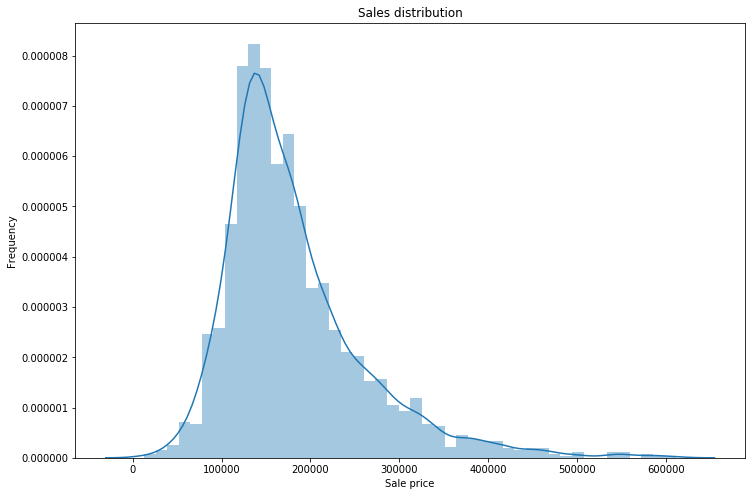

In [299]:
#checking the distribution of Sales price
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(housing_train.SalePrice,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Sale price')
plt.title('Sales distribution');

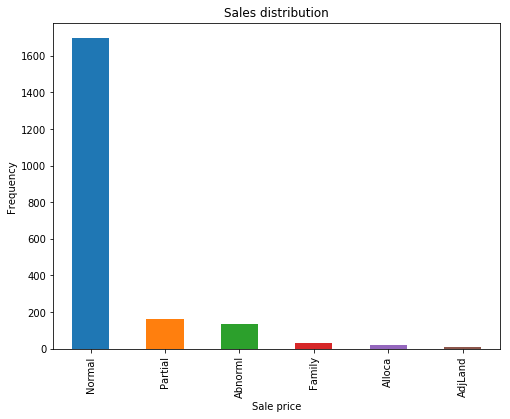

In [300]:
#displaying the sale condition
housing_train.Sale_Condition.value_counts().plot(kind='bar',figsize=(8,6))
plt.ylabel('Frequency')
plt.xlabel('Sale price')
plt.title('Sales distribution');


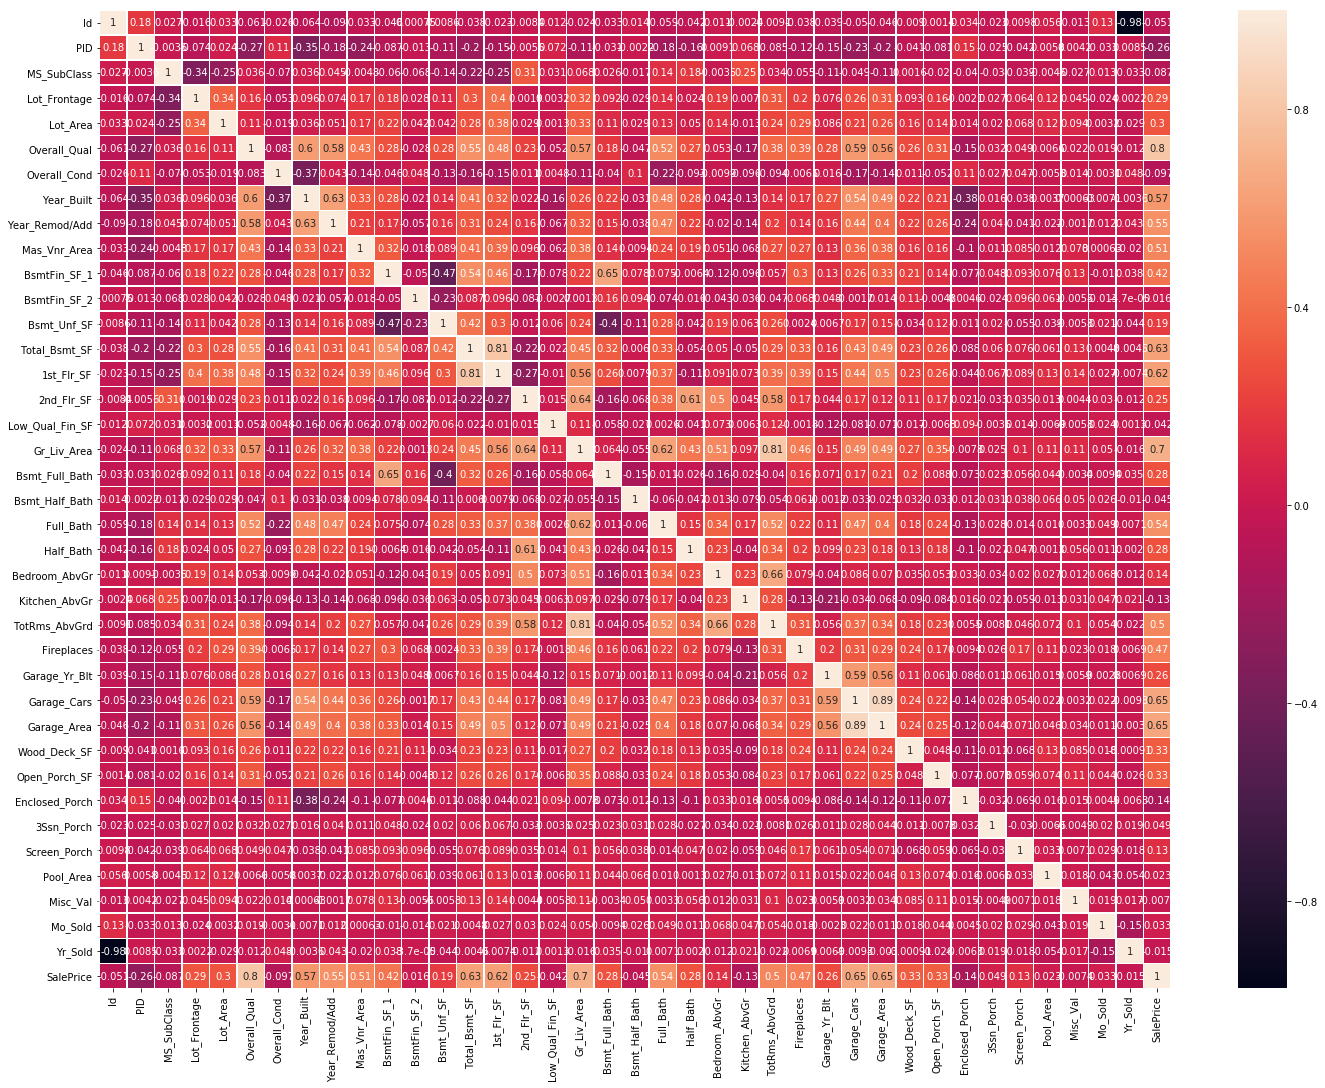

In [301]:
# printing a corrolation heatmap for strong sales price relationship with other attributes
fig, ax = plt.subplots(figsize=(24,18)) 
sns.heatmap(data=housing_train.corr(), annot=True, linewidths=.5, ax=ax);



## sale price strong corrolation
    1- Overall_Qual: 0.80
    2- Total_Bsmt_SF: 0.63
    3- 1st_Flr_SF: 0.62
    4- Gr_Live_Area: 0.70
    5- Garage_Cars: 0.65
    6- Garage_Area: 0.65
    

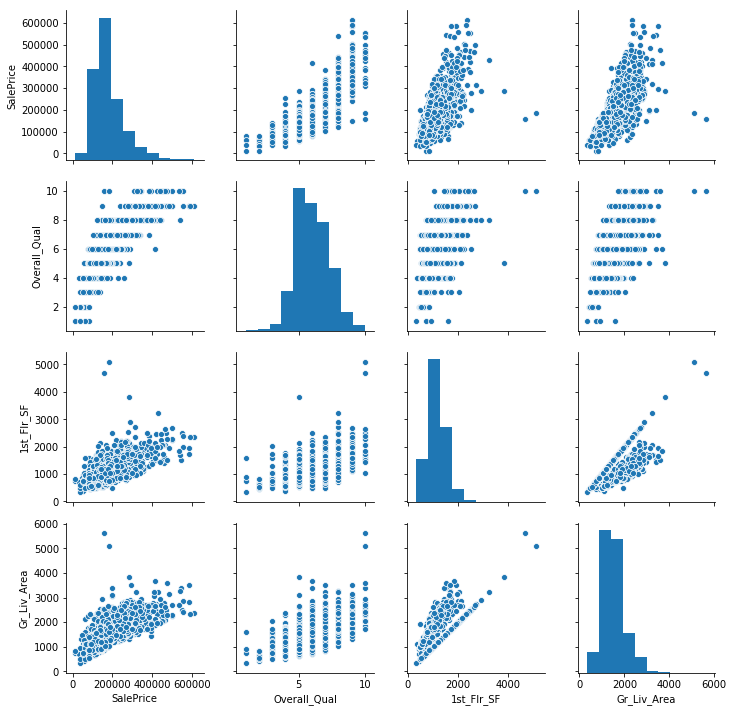

In [302]:
# subsetting data for pairplot
pp_housing = housing_train[['SalePrice','Overall_Qual','1st_Flr_SF','Gr_Liv_Area']]

# viewing distribution between sale price and some highly corrolated attributes
sns.pairplot(pp_housing);

In [303]:
# subsetting the number attributes from the origenal data set to check for outliers
outlier_check = housing_train.select_dtypes(exclude=['object'])


In [304]:
# scaling columns on the same scale for better visualisation
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
outlier_check2 = scale.fit_transform(outlier_check)


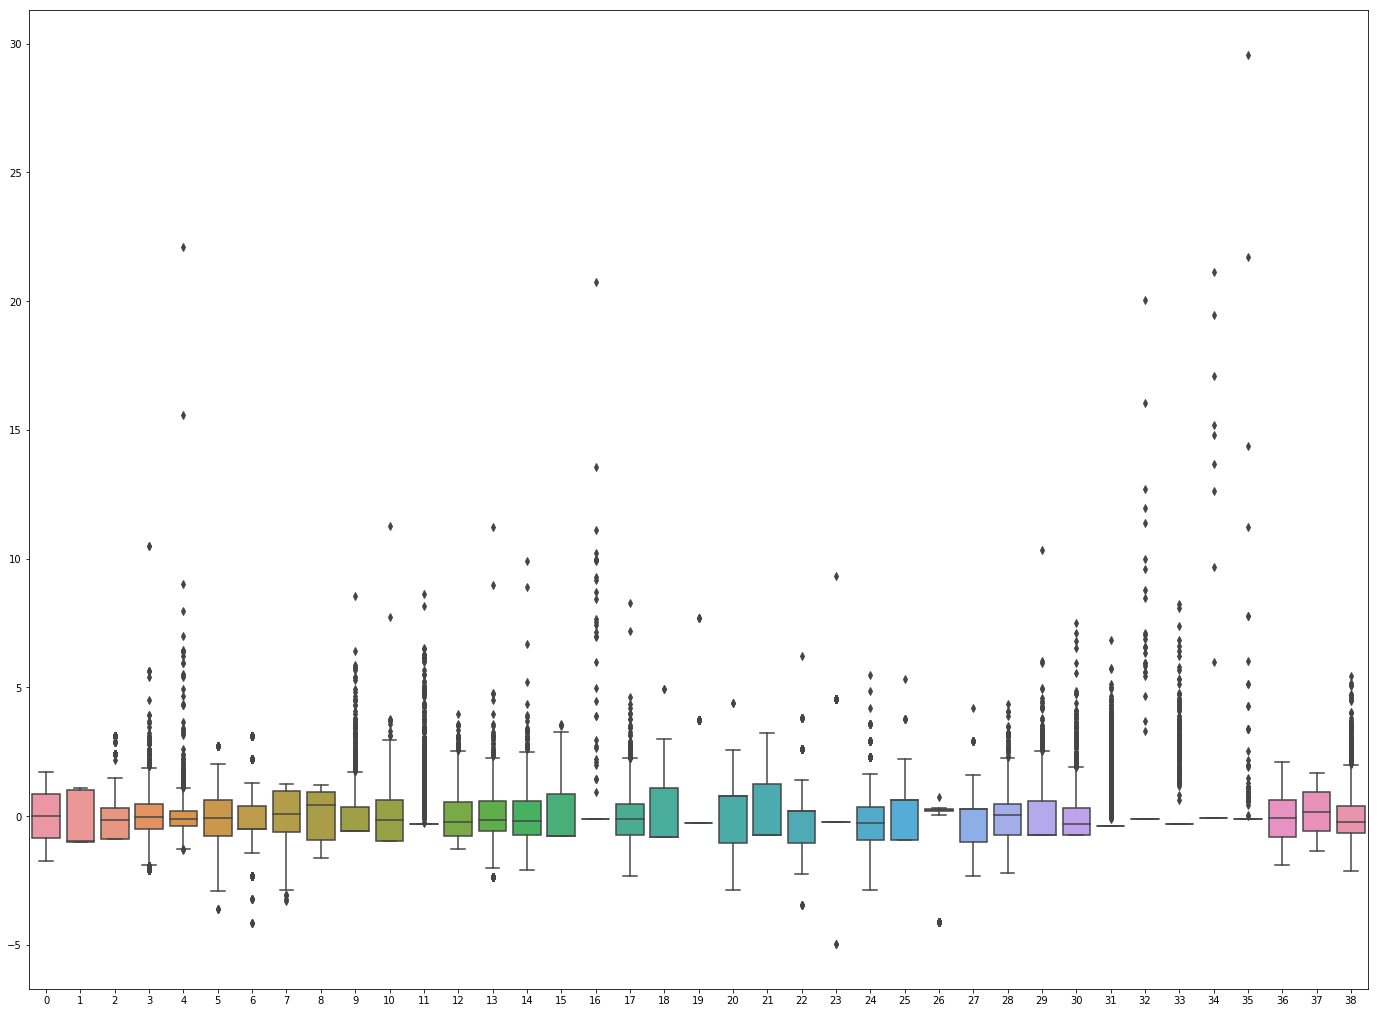

In [305]:
# displaying box plot
fig, ax = plt.subplots(figsize=(24,18)) 
sns.boxplot(data = outlier_check2)

In [306]:
# removing the Misk val outlier using a mask and loc
mask = outlier_check['Misc_Val'].max()
housing_train = housing_train.loc[~(housing_train.Misc_Val == mask)]

<br>

<h3><left> <font color = '#A93226'>Feature engineering</font></left></h3>

---

In [307]:
# checking for sale condition value counts
housing_train.Sale_Condition.value_counts()

Normal     1696
Partial     163
Abnorml     132
Family       29
Alloca       19
AdjLand      11
Name: Sale_Condition, dtype: int64

In [308]:
# creating a dictionary where the keys represent the sale conditions and the values represent numbers. For any abnormal ..
# .. condition, the value equals 1, otherwise the value equals 0.
EncodedSaleConditionDictionary = {'Abnorml': 1, 'Normal': 0, 'Partial': 0, 'Family' : 0, 'Alloca' : 0, 'AdjLand' : 0}
# creating a new column named 'EncodedSaleCondition' that contains the same values in the 'Sale Condition' but after ..
# being encoded.
housing_train['Encoded_Sale_Condition'] = housing_train['Sale_Condition'].map(EncodedSaleConditionDictionary)
# showing the first five rows in the 'EncodedSaleCondition' column.
housing_train['Encoded_Sale_Condition'].head()

0    0
1    0
2    1
3    0
4    0
Name: Encoded_Sale_Condition, dtype: int64

In [309]:
# adding a new feature called house age, values are years between built and sold
housing_train['House_Age'] = housing_train['Yr_Sold'] - housing_train['Year_Built']
housing_test['House_Age'] = housing_test['Yr_Sold'] - housing_test['Year_Built']
housing_train.head()

Id        PID  MS_SubClass MS_Zoning  Lot_Frontage  Lot_Area Street Alley  \
0  109  533352170           60        RL          43.0     13517   Pave  None   
1  544  531379050           60        RL          43.0     11492   Pave  None   
2  153  535304180           20        RL          68.0      7922   Pave  None   
3  318  916386060           60        RL          73.0      9802   Pave  None   
4  255  906425045           50        RL          82.0     14235   Pave  None   

  Lot_Shape Land_Contour Utilities Lot_Config Land_Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition_1 Condition_2 Bldg_Type House_Style  Overall_Qual  Overall_Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year_Built  Year_Remod/Add Roof_Style Roof_Matl Exterior_1st Exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas_Vnr_Type  Mas_Vnr_Area Exter_Qual Exter_Cond Foundation Bsmt_Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt_Cond Bsmt_Exposure BsmtFin_Type_1  BsmtFin_SF_1 BsmtFin_Type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF Heating Heating_QC Central_Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st_Flr_SF  2nd_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt_Full_Bath  Bsmt_Half_Bath  Full_Bath  Half_Bath  Bedroom_AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

<br>

<h2><left> <font color = '#A93226'>Preprocessing</font></left></h2>

---

In [310]:
# importing needed libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier

In [311]:
# prepering features and target
y = housing_train.Encoded_Sale_Condition
X = housing_train.drop(labels=['Sale_Condition','Encoded_Sale_Condition'],axis=1)
X.drop(labels=['SalePrice'],inplace=True,axis=1)

X.shape,housing_test.shape

((2050, 81), (879, 81))

In [312]:
# joining train and validation and dummefing
joined_lis = [X,housing_test]
joined = pd.concat(joined_lis,join='outer')
X_dumm = pd.get_dummies(joined,drop_first=True)
X_dumm.head(2)

Id        PID  MS_SubClass  Lot_Frontage  Lot_Area  Overall_Qual  \
0  109  533352170           60          43.0     13517             6   
1  544  531379050           60          43.0     11492             7   

   Overall_Cond  Year_Built  Year_Remod/Add  Mas_Vnr_Area  BsmtFin_SF_1  \
0             8        1976            2005         289.0         533.0   
1             5        1996            1997         132.0         637.0   

   BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  1st_Flr_SF  2nd_Flr_SF  \
0           0.0        192.0          725.0         725         754   
1           0.0        276.0          913.0         913        1209   

   Low_Qual_Fin_SF  Gr_Liv_Area  Bsmt_Full_Bath  Bsmt_Half_Bath  Full_Bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  TotRms_AbvGrd  Fireplaces  \
0          1              3              1              6           0   
1          1              4              1              8           1   

   Garage_Yr_Blt  Garage_Cars  Garage_Area  Wood_Deck_SF  Open_Porch_SF  \
0         1976.0          2.0        475.0             0             44   
1         1997.0          2.0        559.0             0             74   

   Enclosed_Porch  3Ssn_Porch  Screen_Porch  Pool_Area  Misc_Val  Mo_Sold  \
0               0           0             0          0         0        3   
1               0           0             0          0         0        4   

   Yr_Sold  House_Age  MS_Zoning_C (all)  MS_Zoning_FV  MS_Zoning_I (all)  \
0     2010         34                  0             0                  0   
1     2009         13                  0             0                  0   

   MS_Zoning_RH  MS_Zoning_RL  MS_Zoning_RM  Street_Pave  Alley_None  \
0             0             1             0            1           1   
1             0             1             0            1           1   

   Alley_Pave  Lot_Shape_IR2  Lot_Shape_IR3  Lot_Shape_Reg  Land_Contour_HLS  \
0           0              0              0              0                 0   
1           0              0              0              0                 0   

   Land_Contour_Low  Land_Contour_Lvl  Utilities_NoSeWa  Utilities_NoSewr  \
0                 0                 1                 0                 0   
1                 0                 1                 0                 0   

   Lot_Config_CulDSac  Lot_Config_FR2  Lot_Config_FR3  Lot_Config_Inside  \
0                   1               0               0                  0   
1                   1               0               0                  0   

   Land_Slope_Mod  Land_Slope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0               0               0                     0                    0   
1               0               0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
0                    0                     0                    0   
1                    0                     0                    0   

   Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0             

In [313]:
# re-splitting as training and validation data sets
validation_set = X_dumm[2050:]
X = X_dumm[:2050]
validation_set.shape,X.shape

((879, 273), (2050, 273))

In [314]:
# standerizing the training and validation set on the same scale
scale2 = StandardScaler()
X_std = scale2.fit_transform(X)
valid_std = scale2.transform(validation_set)
X_std

array([[-1.61724347, -0.95494158,  0.06943997, ..., -0.04421577,
         0.        ,  0.38863703],
       [-1.10174066, -0.96540114,  0.06943997, ..., -0.04421577,
         0.        ,  0.38863703],
       [-1.56510066, -0.94459394, -0.86478111, ..., -0.04421577,
         0.        ,  0.38863703],
       ...,
       [-0.66089687,  1.03771697, -0.1641153 , ..., -0.04421577,
         0.        ,  0.38863703],
       [-0.98915958, -0.94525667, -0.86478111, ..., -0.04421577,
         0.        ,  0.38863703],
       [-1.7345648 , -0.98775512,  0.06943997, ..., -0.04421577,
         0.        ,  0.38863703]])

In [315]:
# choosing only importent columns that have a corrolation with sale condition
feat = ExtraTreeClassifier()
feat.fit(X_std,y)
ft_imp = feat.feature_importances_

imported_features_ind = []
imported_features = []

# storing columns indexes for dimension reduction for columns that have more or less than 0
for i in range(len(ft_imp)):
    if ft_imp[i] > 0 or ft_imp[i] < 0:
        imported_features_ind.append(i)


ft_imp[:5]

array([0.02015985, 0.00394947, 0.02683979, 0.02027052, 0.        ])

In [316]:
# transforming to a data frame
# subsetting the important featurs by the index list

# training set
X_std = pd.DataFrame(X_std,columns=X.columns)
X_std = X_std.iloc[:,imported_features_ind]
# validation set
valid_std = pd.DataFrame(valid_std,columns=X.columns)
valid_std = valid_std.iloc[:,imported_features_ind]
X_std.shape,valid_std.shape

((2050, 135), (879, 135))

In [317]:
# 30/70 train test split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.3,random_state = 42)

<br>

<h2><left> <font color = '#A93226'>Modeling</font></left></h2>

---

In [318]:
scores = []

In [319]:
# importing needed liraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

<br>

<h3><left> <font color = '#A93226'>Grid search</font></left></h3>

---

In [398]:
# choosing parameters for Grid search
# parameters for decision tree
params_dt = {'max_depth':np.arange(20,30),
             'criterion':['gini','entropy']}
# parameters for KNN
params_knn = {'n_neighbors':np.arange(1,20),
             'weights':['uniform','distance'],
             'metric':['euclidean','minkowski','manhattan']}
# parameters for Random forst
params_forest = {'max_depth':np.arange(20,30),
             'criterion':['gini','entropy'],
                'n_estimators':np.arange(10,30)}

In [321]:
# using decision tree
dt = DecisionTreeClassifier()
# grid search with decision trees
grd = GridSearchCV(dt,params_dt,cv=5,n_jobs=-1)
grd.fit(X_train,y_train)
# displaying best parameters
dt_best_est = grd.best_estimator_
dt_best_est

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [399]:
# using knn
knn = KNeighborsClassifier(n_jobs=-1)
# grid search with knn
grd = GridSearchCV(knn,params_knn,cv=5,n_jobs=-1)
grd.fit(X_train,y_train)
# displaying best parameters
knn_best_est = grd.best_estimator_
knn_best_est

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=14, p=2,
           weights='uniform')

In [323]:
# using random forest
forest = RandomForestClassifier(n_jobs=-1)
# grid search with knn
grd = GridSearchCV(forest,params_forest,cv=5,n_jobs=-1)
grd.fit(X_train,y_train)
# displaying best parameters
forest_best_est = grd.best_estimator_
forest_best_est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<br>

<h3><left> <font color = '#A93226'>Classifeing</font></left></h3>

---

In [433]:
# decision tree classifier
dt = DecisionTreeClassifier(max_depth=25,criterion='entropy')
dt.fit(X_train,y_train)
#cross val scores
cross_val = cross_val_score(dt,X_test,y_test,cv=5,n_jobs=-1)
#predicting y_test
dt_prediction = dt.predict(X_test)

In [434]:
# printing scores and prediction
print('cross validation mean score: ',cross_val.mean())
print('Actual sum of abnormal sale condition: ',y_test.sum(),' prediction: ',dt_prediction.sum())
print(classification_report(y_test,dt_prediction))
# creating a dictionary for scores
scores = {'classifier':['Decision Tree'],'cross_val':[cross_val.mean()],'actual':[y_test.sum()],'prediction':[dt_prediction.sum()],
          'f1_score':[f1_score(y_test,dt_prediction)]}

cross validation mean score:  0.8828438517066293
Actual sum of abnormal sale condition:  46  prediction:  44
             precision    recall  f1-score   support

          0       0.94      0.94      0.94       569
          1       0.20      0.20      0.20        46

avg / total       0.88      0.88      0.88       615



In [435]:
# KneighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14,weights='uniform',metric='euclidean')
knn.fit(X_train,y_train)
#cross val scores
cross_val_knn = cross_val_score(knn,X_test,y_test,cv=5,n_jobs=-1)
#predicting y_test
knn_prediction = knn.predict(X_test)

In [436]:
# printing scores and prediction
print('cross validation mean score: ',cross_val_knn.mean())
print('Actual sum of abnormal sale condition: ',y_test.sum(),' prediction: ',knn_prediction.sum())
print(classification_report(y_test,knn_prediction))
scores['classifier'].append('KNN')
scores['cross_val'].append(cross_val_knn.mean())
scores['actual'].append(y_test.sum())
scores['prediction'].append(knn_prediction.sum())
scores['f1_score'].append(f1_score(y_test,knn_prediction))

cross validation mean score:  0.9252144303568894
Actual sum of abnormal sale condition:  46  prediction:  0
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       569
          1       0.00      0.00      0.00        46

avg / total       0.86      0.93      0.89       615



/Users/sultan.almuhanna/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sultan.almuhanna/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<br>

<h3><left> <font color = '#A93226'>Ensamble approches</font></left></h3>

---

In [437]:
# boosting using Adaboost
dt_boost = DecisionTreeClassifier(max_depth=25,criterion='entropy')
# AaBoost
ada_dt = AdaBoostClassifier(base_estimator=dt_boost)
ada_dt.fit(X_train,y_train)
# Cross val scores
cross_val_boost_dt = cross_val_score(dt_boost,X_test,y_test,cv=5)
# predicting y_test
ada_dt_prediction = ada_dt.predict(X_test)

In [438]:
# printing scores and prediction
print('cross validation mean score: ',cross_val_boost.mean())
print('Actual sum of abnormal sale condition: ',y_test.sum(),' prediction: ',ada_dt_prediction.sum())
print(classification_report(y_test,ada_dt_prediction))
# adding scores
scores['classifier'].append('AdaBoost_dt')
scores['cross_val'].append(cross_val_boost.mean())
scores['actual'].append(y_test.sum())
scores['prediction'].append(ada_dt_prediction.sum())
scores['f1_score'].append(f1_score(y_test,ada_dt_prediction))

cross validation mean score:  0.871580830033578
Actual sum of abnormal sale condition:  46  prediction:  47
             precision    recall  f1-score   support

          0       0.94      0.93      0.94       569
          1       0.21      0.22      0.22        46

avg / total       0.88      0.88      0.88       615



In [439]:
# boosting using Adaboost
knn = KNeighborsClassifier(n_neighbors=14,weights='uniform')
# AaBoost
bag_knn = BaggingClassifier(base_estimator=knn)
bag_knn.fit(X_train,y_train)
# Cross val scores
cross_val_bag_knn = cross_val_score(bag_knn,X_test,y_test,cv=5)
# predicting y_test
bag_knn_prediction = bag_knn.predict(X_test)

In [440]:
# printing scores and prediction
print('cross validation mean score: ',cross_val_bag_knn.mean())
print('Actual sum of abnormal sale condition: ',y_test.sum(),' prediction: ',bag_knn_prediction.sum())
print(classification_report(y_test,bag_knn_prediction))
scores['classifier'].append('Bagging_knn')
scores['cross_val'].append(cross_val_bag_knn.mean())
scores['actual'].append(y_test.sum())
scores['prediction'].append(bag_knn_prediction.sum())
scores['f1_score'].append(f1_score(y_test,bag_knn_prediction))

cross validation mean score:  0.9252144303568894
Actual sum of abnormal sale condition:  46  prediction:  0
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       569
          1       0.00      0.00      0.00        46

avg / total       0.86      0.93      0.89       615



/Users/sultan.almuhanna/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sultan.almuhanna/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [441]:
# random forest
forest = RandomForestClassifier(criterion='gini',max_depth=25,n_estimators=12,n_jobs=-1)
forest.fit(X_train,y_train)
# Cross val scores
cross_val_forest = cross_val_score(forest,X_test,y_test,cv=5)
# predicting y_test
forest_prediction = forest.predict(X_test)

In [442]:
# printing scores and prediction
print('cross validation mean score: ',cross_val_forest.mean())
print('Actual sum of abnormal sale condition: ',y_test.sum(),' prediction: ',forest_prediction.sum())
print(classification_report(y_test,forest_prediction))
#adding scores
scores['classifier'].append('Random Forest')
scores['cross_val'].append(cross_val_forest.mean())
scores['actual'].append(y_test.sum())
scores['prediction'].append(forest_prediction.sum())
scores['f1_score'].append(f1_score(y_test,forest_prediction))

cross validation mean score:  0.9252144303568894
Actual sum of abnormal sale condition:  46  prediction:  5
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       569
          1       0.60      0.07      0.12        46

avg / total       0.90      0.93      0.90       615



<br>

<h3><left> <font color = '#A93226'>Visualizing trees</font></left></h3>

---

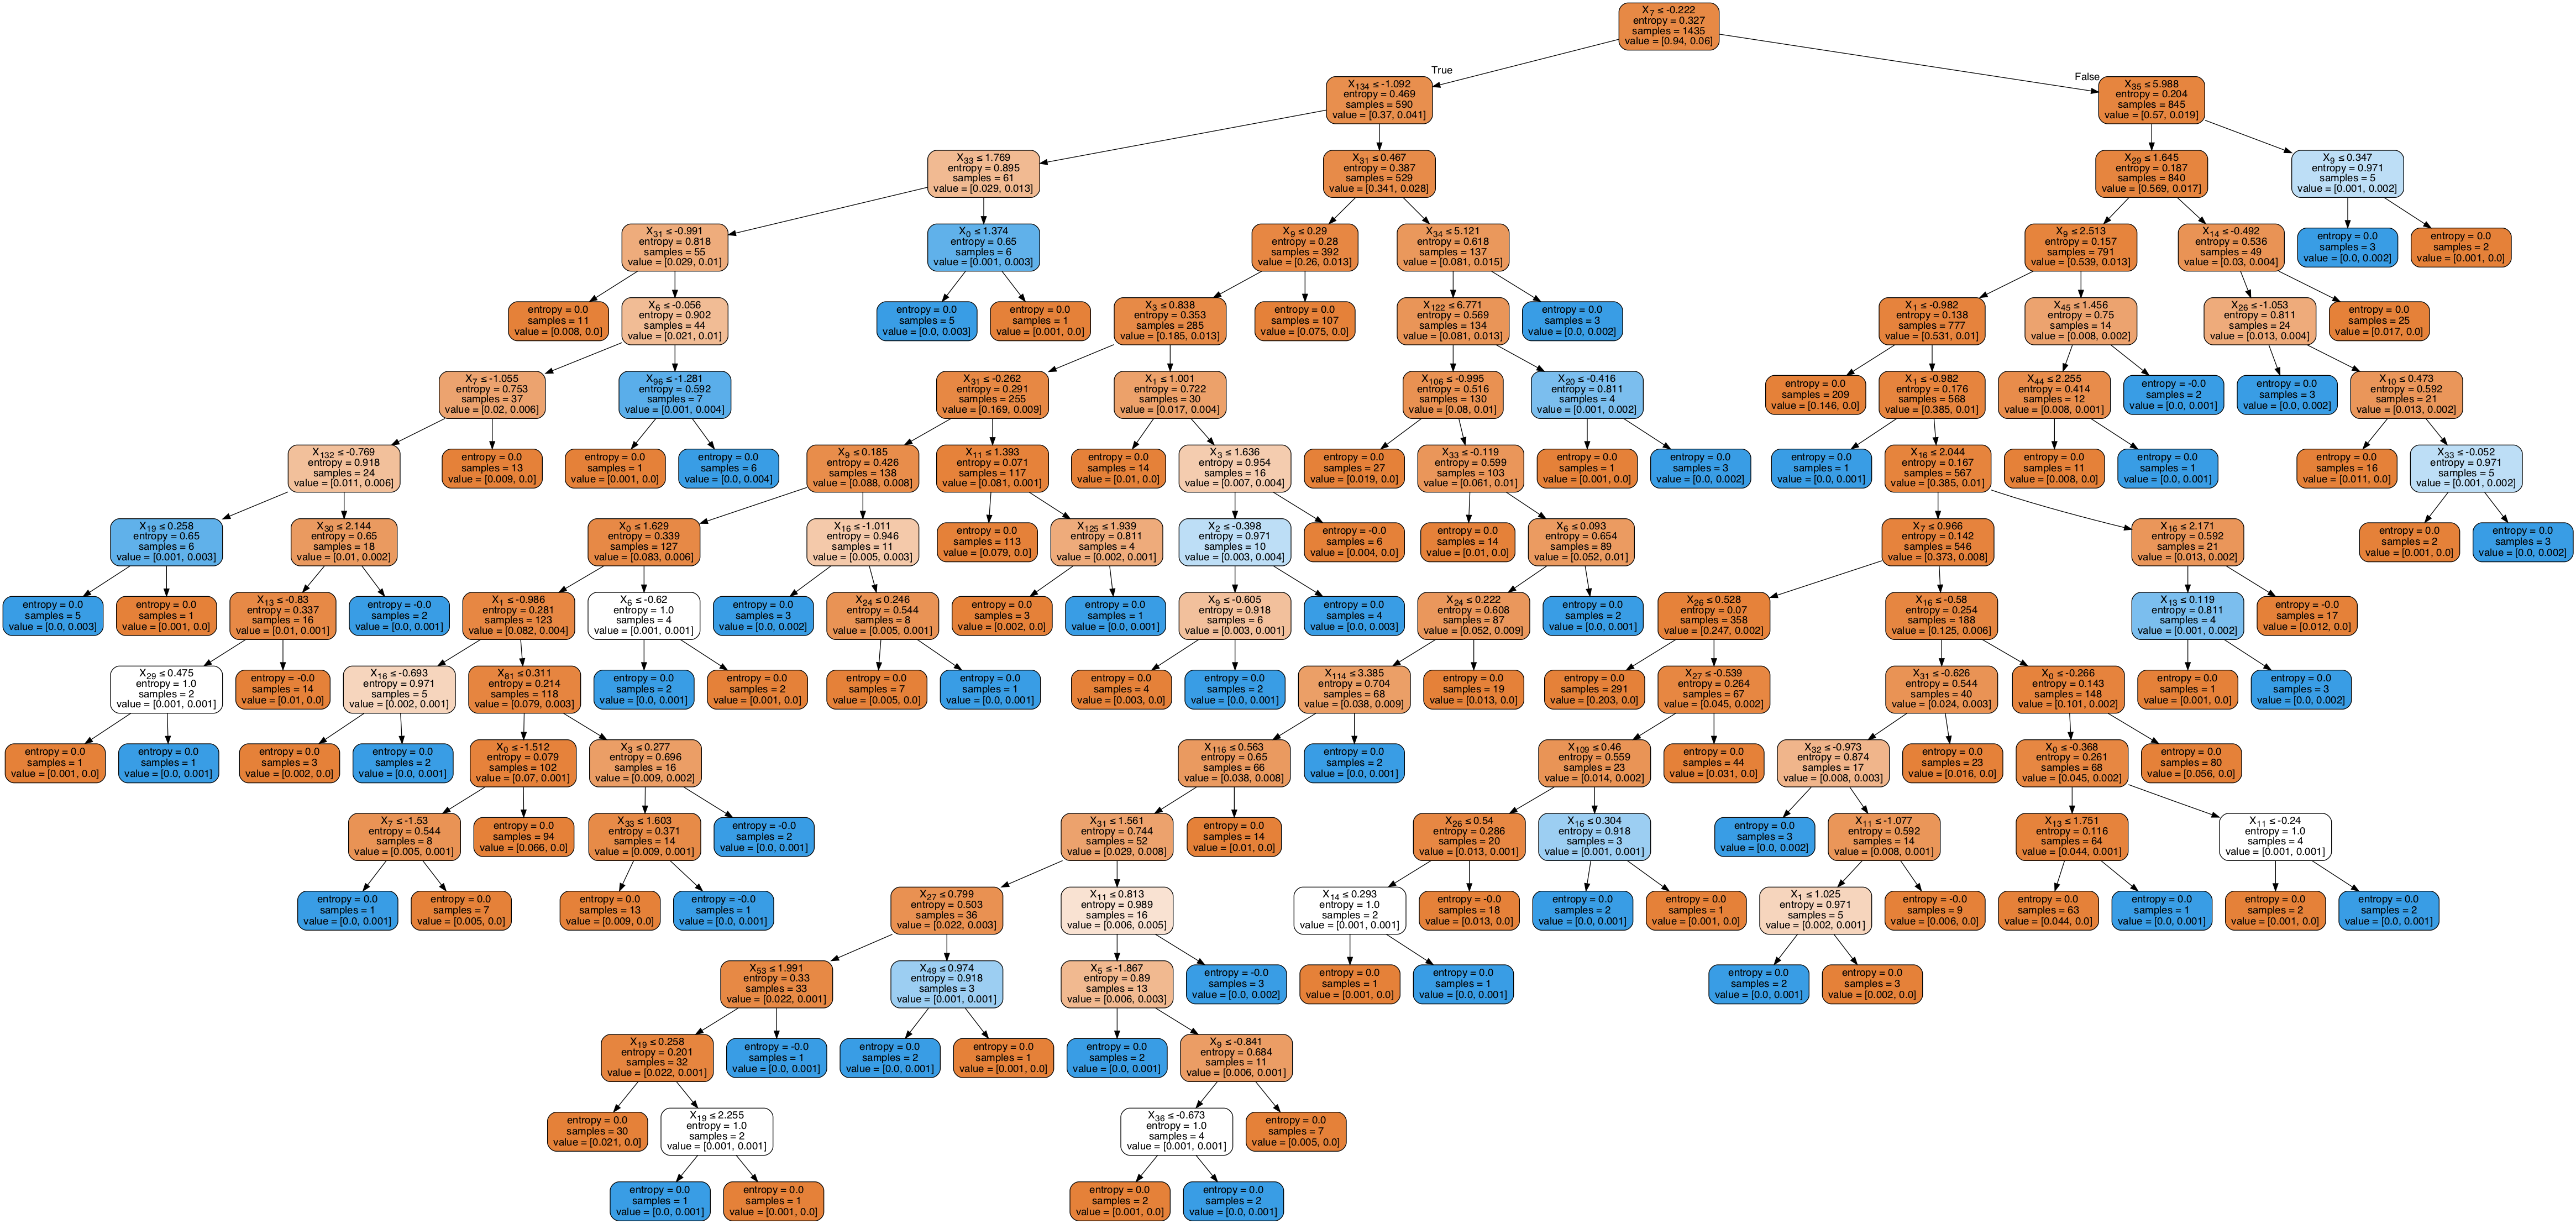

In [443]:
# visualisin normal Decision tree
dot_data = StringIO()  

export_graphviz(ada_dt.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

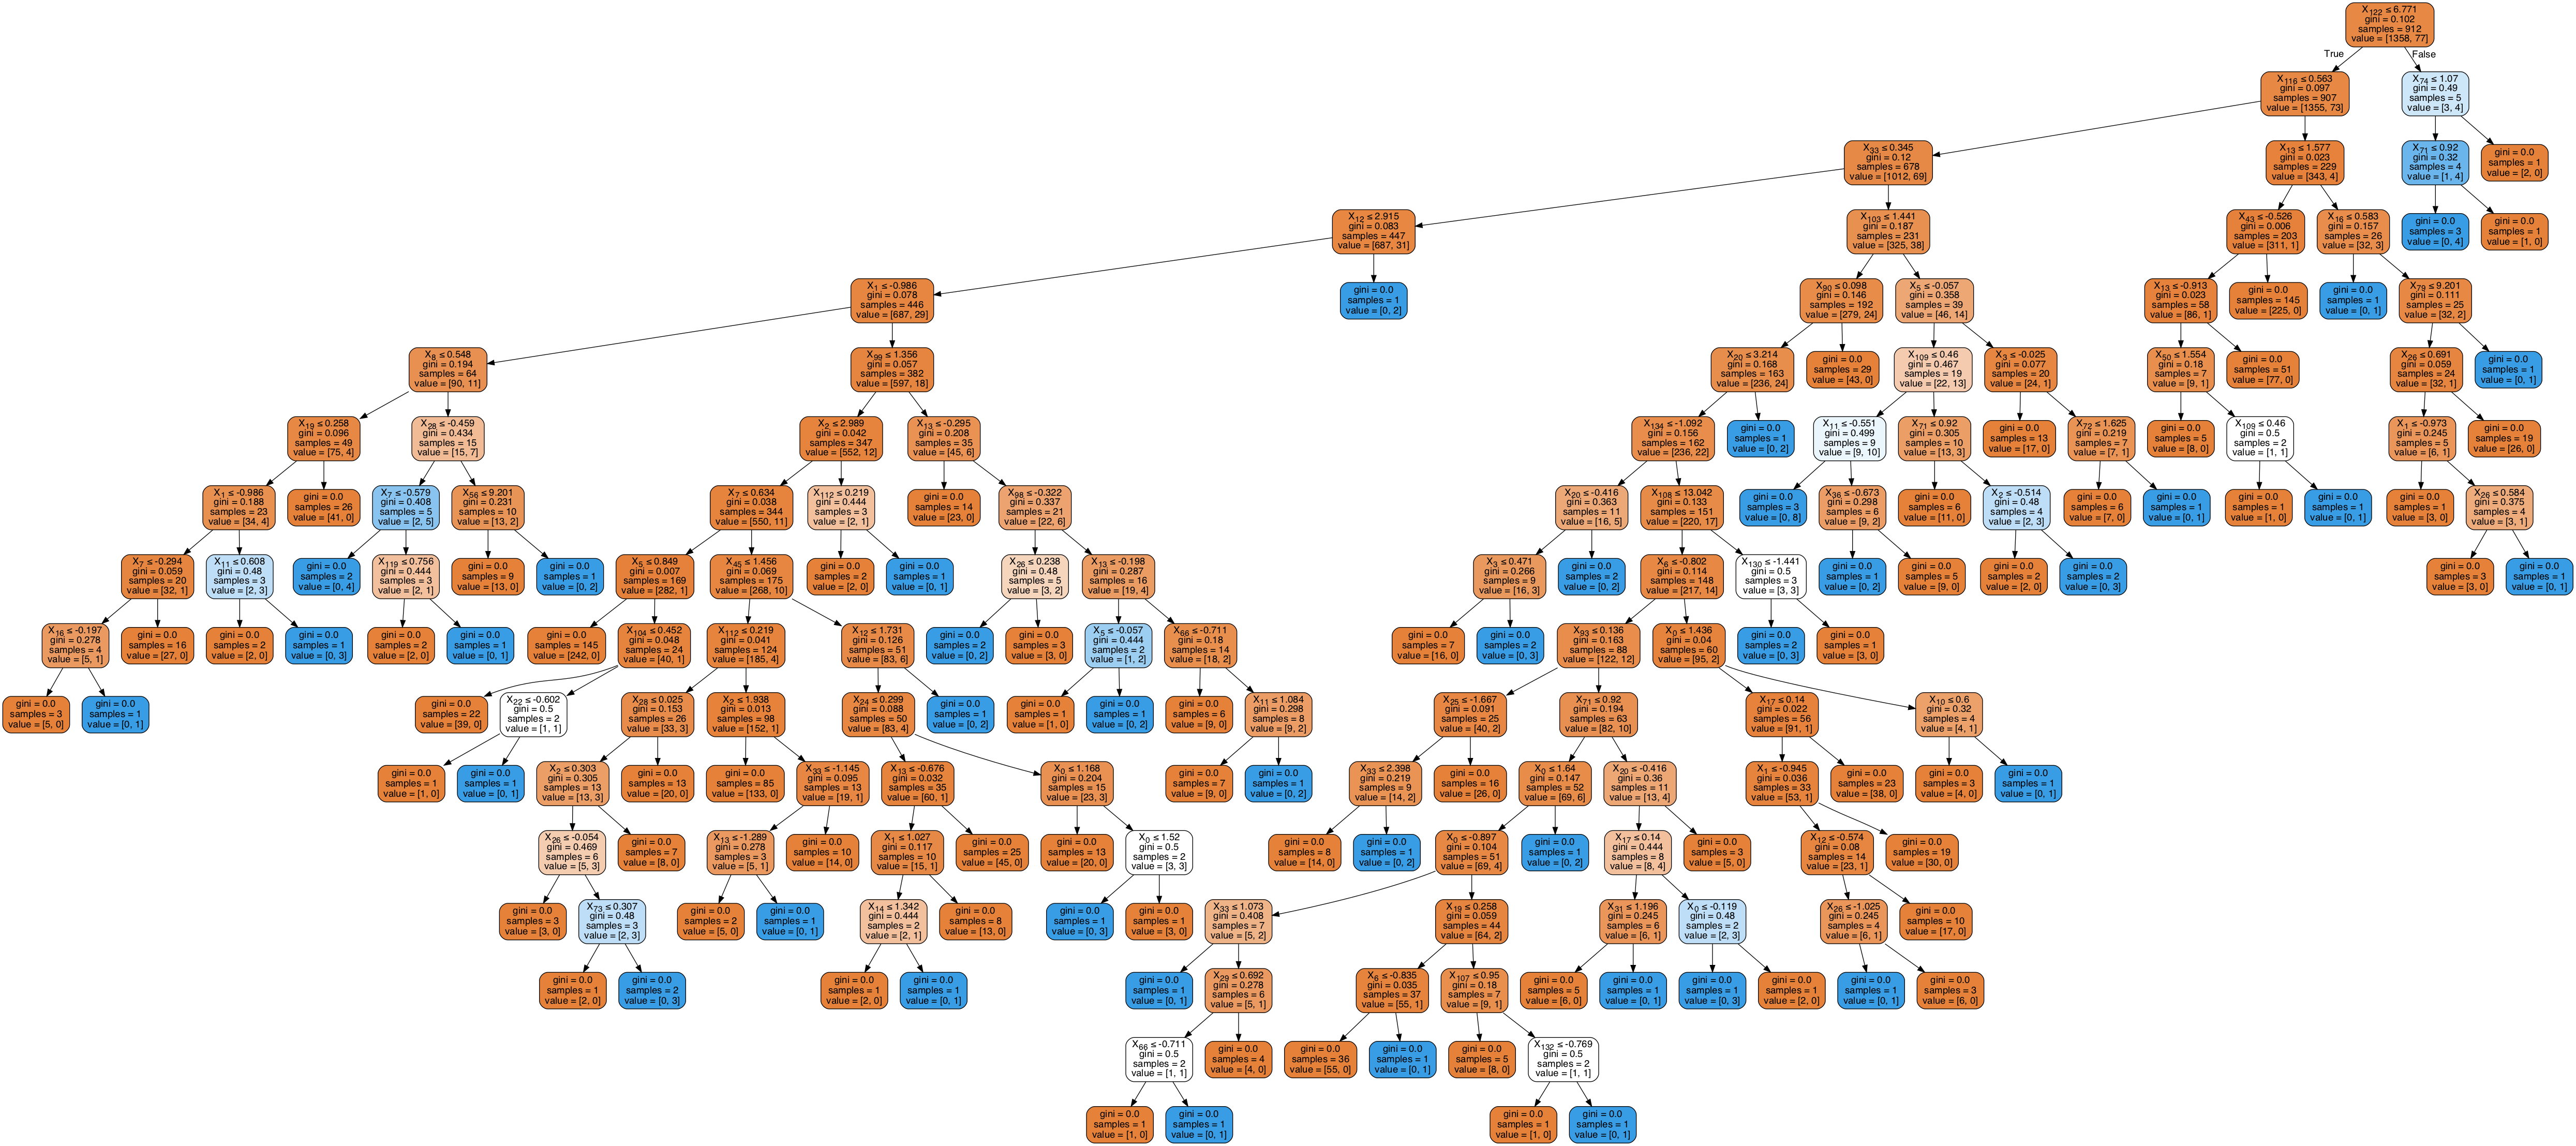

In [444]:
# visualisin Random Forest
dot_data = StringIO()  

export_graphviz(forest.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

<br>

<h2><left> <font color = '#A93226'>Conclusion</font></left></h2>

---

In [445]:
# transforming scores dictionary to a DataFrame
scores = pd.DataFrame(scores)
# displaying score resualts
scores

classifier  cross_val  actual  prediction  f1_score
0  Decision Tree   0.882844      46          44  0.200000
1            KNN   0.925214      46           0  0.000000
2    AdaBoost_dt   0.871581      46          47  0.215054
3    Bagging_knn   0.925214      46           0  0.000000
4  Random Forest   0.925214      46           5  0.117647

<br>

<h4><font color = '#A93226'><left>      Original goal is to predict weather sale condition was made in an abnormal manner or not, on the open source data set that describes historical sales. it started by loading and exploring data. second step by cleaning and pre-processing, third step ware to find the best hyper parameters suited for the chosen classifiers. lastly modeling and optaining scores using classifiers and ensamble methods. the best suited classifier that predicted well most of the sale condition that ware on test split by predicting 47 out of 46 abnormal sales and optaining a the best f1_score metric. the classifier normal decision tree classifier boosted using AdaBoost and will be used on the validation set that will be submitted in Kaggle Ames Housing challenge </left></font></h4>

<br>

<h3><left> <font color = '#A93226'>Predicting</font></left></h3>

---

In [447]:
# creating a new DataFrame that holds only id's and predicted sale condition
sub = validation_set[['Id']]
sub['SaleCondition'] = ada_dt.predict(valid_std)
sub.head(2)

/Users/sultan.almuhanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Id  SaleCondition
0  2658              0
1  2718              0

In [448]:
# saving a local prediction file to be submitted in kaggle
sub.to_csv(path_or_buf='prediction',index=False,columns=['Id','SaleCondition'],sep=',',header=True)